<a href="https://colab.research.google.com/github/geocarvalho/python-ds/blob/master/alura/intro_ml_nao_supervisionada/intro_ml_nao_supervisionada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage



In [41]:
uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri)
filmes = filmes.rename(columns={
    'movieId': 'filme_id',
    'title': 'titulo',
    'genres': 'generos'
})
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [42]:
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
dados = pd.concat([filmes, generos], axis=1)
dados.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
df_generos_escalados = pd.DataFrame(data=generos_escalados, columns=generos.columns)
dados = pd.concat([filmes, df_generos_escalados], axis=1)
dados.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,-0.05918,-0.480607,2.591019,3.865793,3.697524,1.262425,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
1,2,Jumanji (1995),Adventure|Children|Fantasy,-0.05918,-0.480607,2.591019,-0.258679,3.697524,-0.792126,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
2,3,Grumpier Old Men (1995),Comedy|Romance,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.334435,-0.491259,-0.20202,-0.132065
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.334435,-0.491259,-0.20202,-0.132065
4,5,Father of the Bride Part II (1995),Comedy,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065


# Agrupamento particionado

In [45]:
modelo = KMeans(n_clusters=3).fit(generos_escalados)
print(f'grupos: {modelo.labels_}')

grupos: [0 0 2 ... 2 0 2]


* Teoria sobre kmeans, centroides e seus pontos ([visualizing-k-means-clustering](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/))

In [46]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.72654617  1.7708958   1.15884697  1.14955356 -0.09016619
  -0.34585718 -0.21098652 -0.55262373  0.96981393 -0.09492563 -0.23744102
   0.58790452  0.19008581 -0.10936515 -0.2693217   0.60164846 -0.16367336
  -0.03503962  0.01879096]
 [-0.05917995  0.38365132 -0.25185085 -0.22152175 -0.25745212 -0.22338075
   2.57954204 -0.1977703   0.18351502 -0.24045863  0.66245806 -0.17053813
  -0.06355894 -0.15241082  0.35221296 -0.25233194 -0.25275038  0.72353067
  -0.15982454 -0.06265926]
 [ 0.02271367 -0.21938255 -0.32886176 -0.20536567 -0.19717895  0.0577108
  -0.37463158  0.07868588  0.08442669 -0.16231455 -0.09492563  0.07952801
  -0.11265357 -0.01355447 -0.03807986  0.10042084 -0.08273198 -0.0910555
   

In [47]:
grupos = pd.DataFrame(data=modelo.cluster_centers_, columns=generos.columns)
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.726546,1.770896,1.158847,1.149554,-0.090166,-0.345857,-0.210987,-0.552624,0.969814,-0.094926,-0.237441,0.587905,0.190086,-0.109365,-0.269322,0.601648,-0.163673,-0.035040,0.018791
1,-0.059180,0.383651,-0.251851,-0.221522,-0.257452,-0.223381,2.579542,-0.197770,0.183515,-0.240459,0.662458,-0.170538,-0.063559,-0.152411,0.352213,-0.252332,-0.252750,0.723531,-0.159825,-0.062659
2,0.022714,-0.219383,-0.328862,-0.205366,-0.197179,0.057711,-0.374632,0.078686,0.084427,-0.162315,-0.094926,0.079528,-0.112654,-0.013554,-0.038080,0.100421,-0.082732,-0.091055,0.035091,0.006914


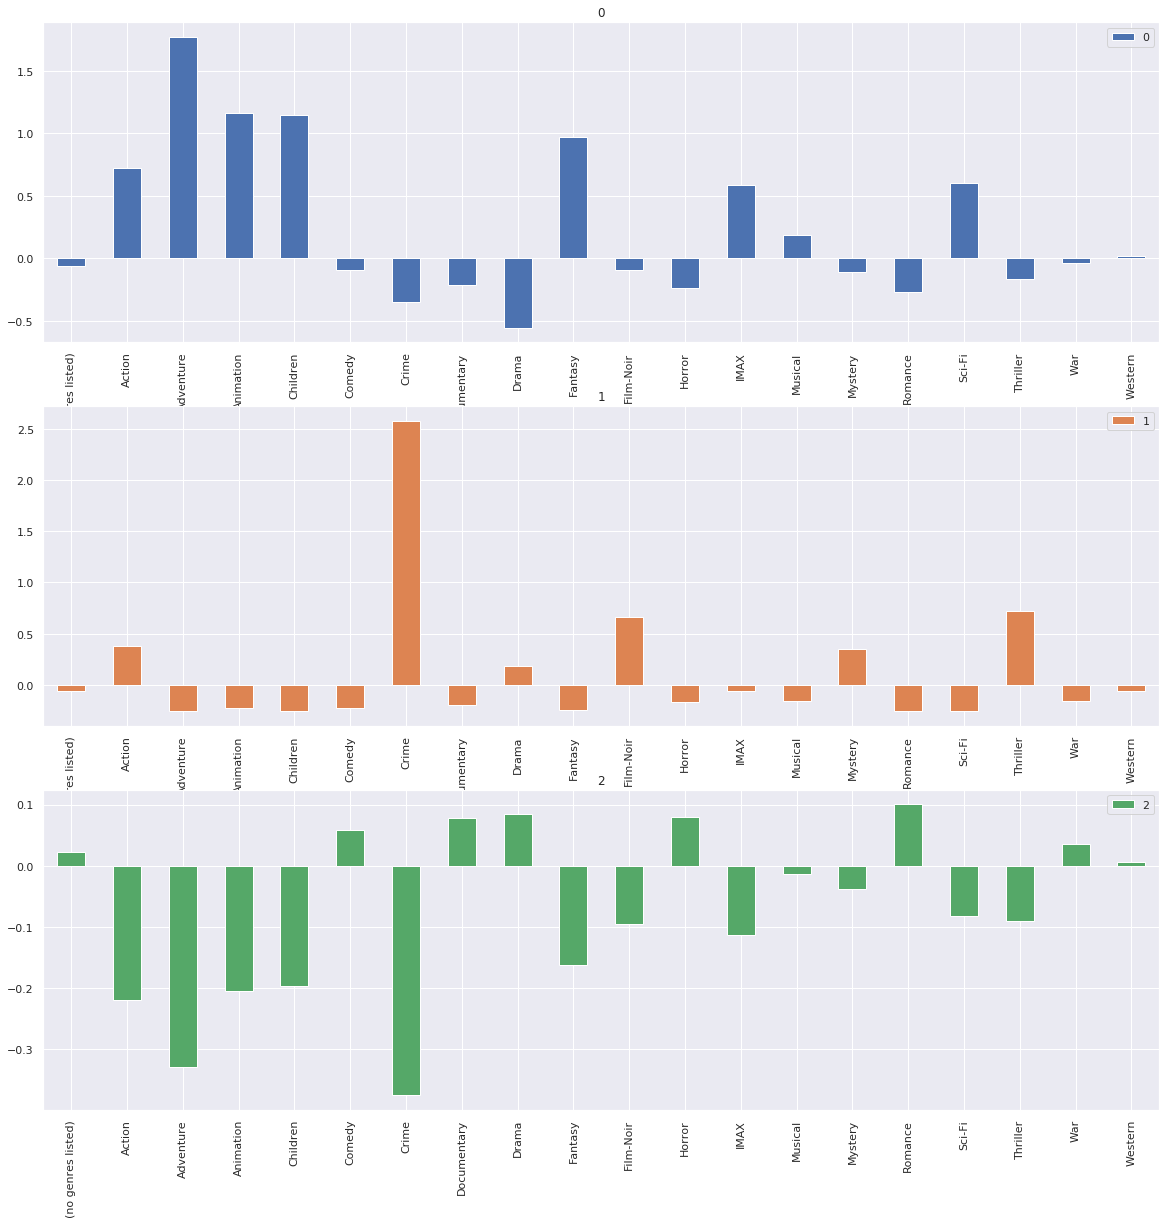

In [48]:
grupos.transpose().plot.bar(subplots=True, sharex=False, figsize=(20,20))
plt.show()

In [49]:
grupo = 0
filtro = modelo.labels_ == grupo
dados[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4447,6566,Spy Kids 3-D: Game Over (2003),Action|Adventure|Children,-0.05918,2.080702,2.591019,-0.258679,3.697524,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
6115,42761,Casper Meets Wendy (1998),Adventure|Children|Comedy|Fantasy,-0.05918,-0.480607,2.591019,-0.258679,3.697524,1.262425,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
8183,103042,Man of Steel (2013),Action|Adventure|Fantasy|Sci-Fi|IMAX,-0.05918,2.080702,2.591019,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,7.788339,-0.188419,-0.249986,-0.442633,2.990120,-0.491259,-0.20202,-0.132065
3568,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,-0.05918,-0.480607,2.591019,3.865793,3.697524,1.262425,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
8163,102666,Ivan Vasilievich: Back to the Future (Ivan Vas...,Adventure|Comedy,-0.05918,-0.480607,2.591019,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
9145,147372,Doctor Who: Last Christmas (2014),Adventure|Drama|Fantasy|Sci-Fi,-0.05918,-0.480607,2.591019,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,2.990120,-0.491259,-0.20202,-0.132065
488,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy,-0.05918,2.080702,2.591019,3.865793,3.697524,-0.792126,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
275,316,Stargate (1994),Action|Adventure|Sci-Fi,-0.05918,2.080702,2.591019,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,2.990120,-0.491259,-0.20202,-0.132065
7762,91414,Arthur Christmas (2011),Animation|Children|Comedy|Drama,-0.05918,-0.480607,-0.385949,3.865793,3.697524,1.262425,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
7550,85261,Mars Needs Moms (2011),Action|Adventure|Animation|Children|Comedy|Sci...,-0.05918,2.080702,2.591019,3.865793,3.697524,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,7.788339,-0.188419,-0.249986,-0.442633,2.990120,-0.491259,-0.20202,-0.132065


In [50]:
new_dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)
new_dados = pd.DataFrame(new_dados, columns=['coluna1', 'coluna2'])
new_dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


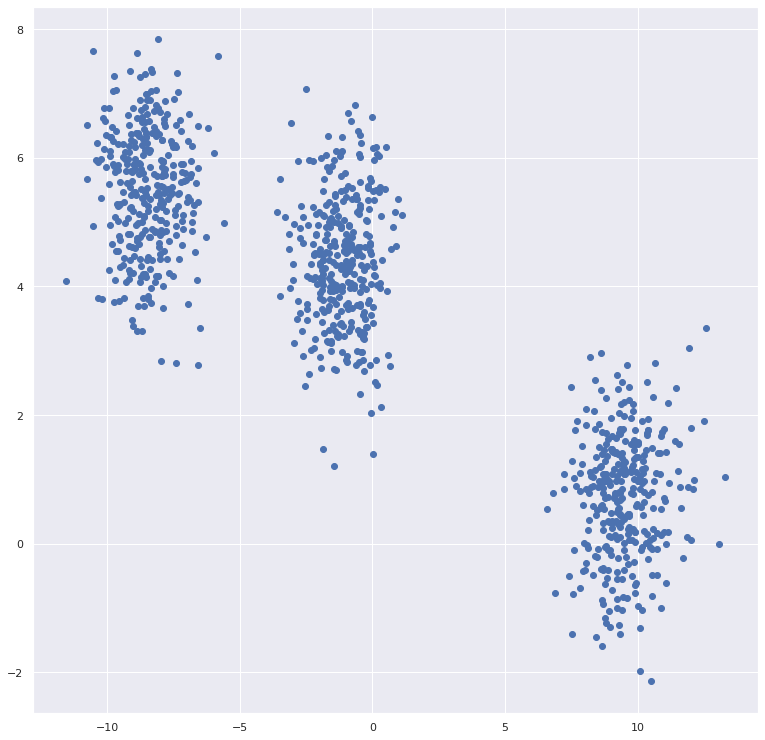

In [51]:
# Exemplo de como plotar dados com centroides
plt.scatter(x=new_dados.coluna1, y=new_dados.coluna2)

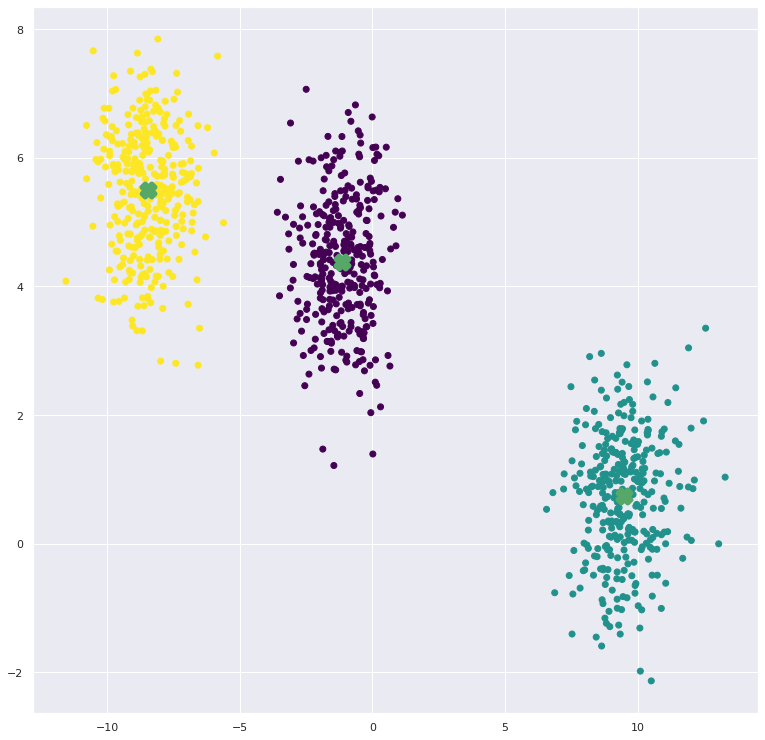

In [52]:
modelo_2 = KMeans(n_clusters=3)
grupos = modelo_2.fit_predict(new_dados)
centroides = modelo_2.cluster_centers_
plt.scatter(x=new_dados.coluna1, y=new_dados.coluna2, c=grupos, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], marker='X', s=169,
            linewidths=5, color='g', zorder=8)

In [53]:
# Reducao de dimensionalidade
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 65.419304 ,  29.53594  ],
       [ 42.019688 ,  62.156662 ],
       [-34.768894 ,   9.007421 ],
       ...,
       [ 32.609314 ,  -4.096308 ],
       [ 56.599117 ,   9.2329235],
       [ -9.30337  , -10.623075 ]], dtype=float32)

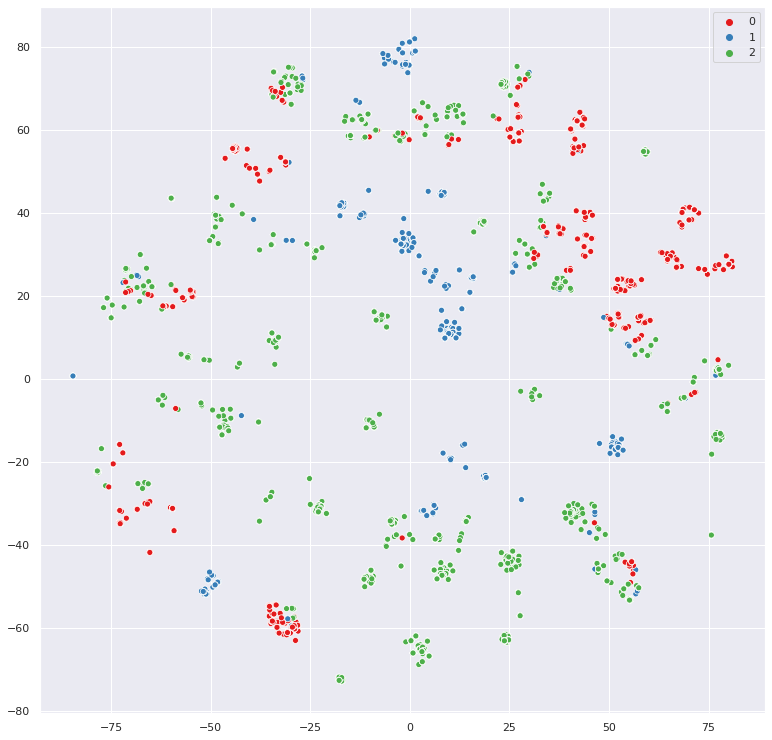

In [54]:
sns.set(rc={'figure.figsize': (13,13)})
sns.scatterplot(x=visualizacao[:,0],y=visualizacao[:,1], hue=modelo.labels_,
                palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8cba56f60>,
      dtype=object)

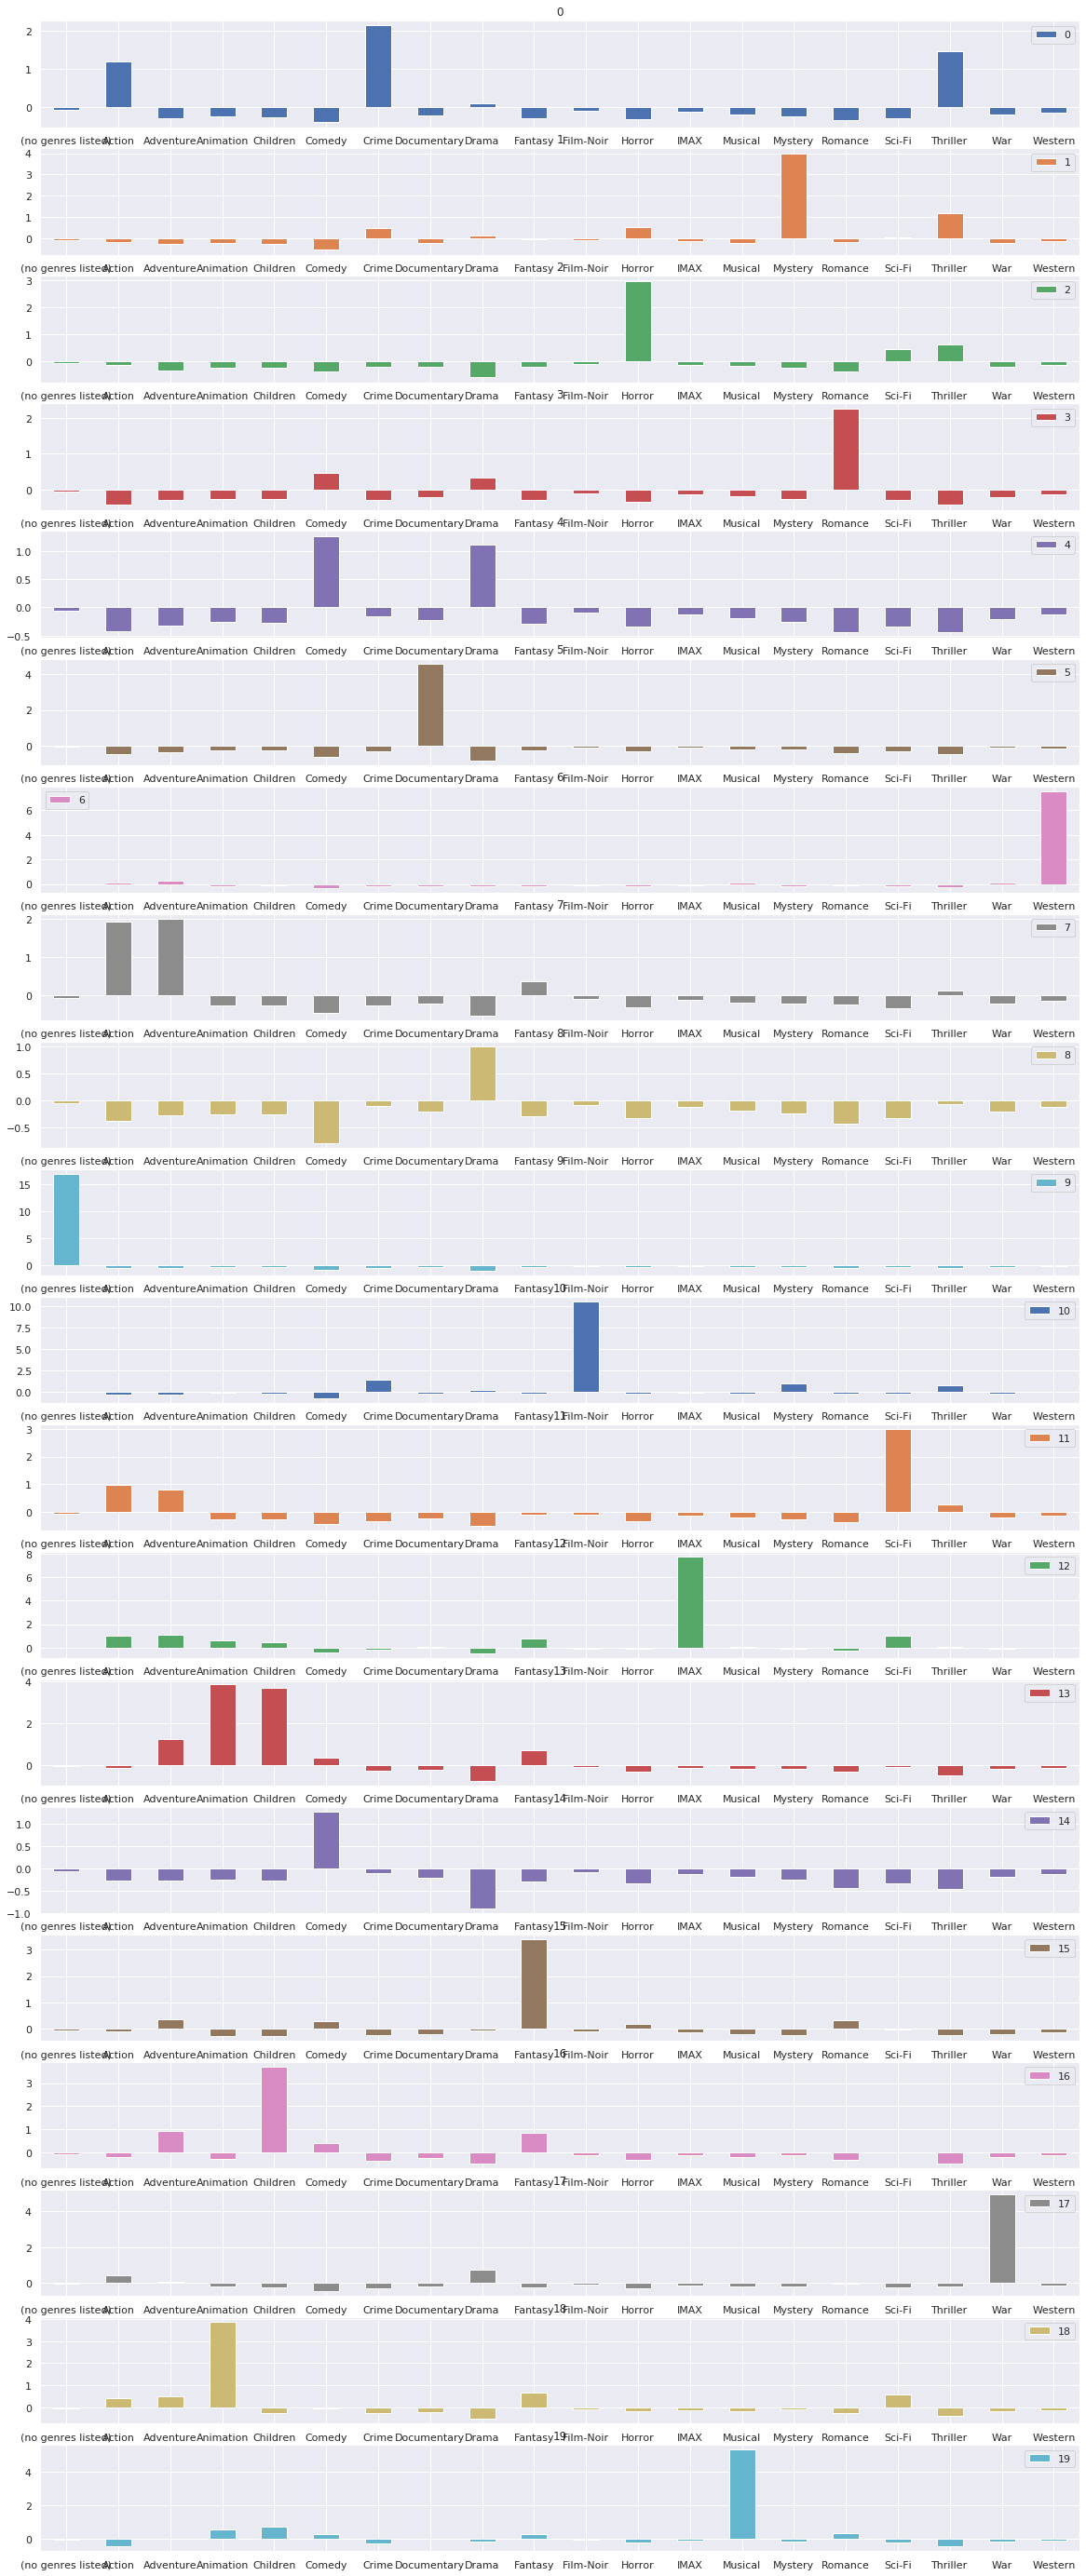

In [55]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(20,50), sharex=False,
                            rot=0)

In [56]:
grupo = 2
filtro = modelo.labels_ == grupo
dados[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8270,105325,Bad Milo (Bad Milo!) (2013),Comedy|Horror,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.29481,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
6050,40478,Night of the Lepus (1972),Horror|Sci-Fi|Thriller,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.29481,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.442633,2.990120,2.035586,-0.20202,-0.132065
2860,3826,Hollow Man (2000),Horror|Sci-Fi|Thriller,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.29481,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.442633,2.990120,2.035586,-0.20202,-0.132065
5099,8092,Frankenstein Unbound (1990),Drama|Horror|Sci-Fi,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.29481,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.442633,2.990120,-0.491259,-0.20202,-0.132065
954,1255,Bad Taste (1987),Comedy|Horror|Sci-Fi,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.29481,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.442633,2.990120,-0.491259,-0.20202,-0.132065
1847,2456,"Fly II, The (1989)",Horror|Sci-Fi,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.29481,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.442633,2.990120,-0.491259,-0.20202,-0.132065
9638,179491,Mayhem (2017),Action|Horror,-0.05918,2.080702,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.29481,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
7481,82366,Hatchet II (2010),Comedy|Horror|Thriller,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.29481,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,2.035586,-0.20202,-0.132065
4362,6379,Wrong Turn (2003),Horror|Thriller,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.29481,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,2.035586,-0.20202,-0.132065
8795,130052,Clown (2014),Drama|Horror,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.29481,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065


In [57]:
# Quantos grupos usar?

def kmeans(num_clusters, generos):
   modelo = KMeans(n_clusters=num_clusters)
   modelo.fit(generos)
   return [num_clusters, modelo.inertia_]

kmeans(20, generos_escalados)

[20, 55148.414055679954]

In [58]:
kmeans(3, generos_escalados)

[3, 167902.30659607486]

In [59]:
resultado = [kmeans(num, generos_escalados) for num in range(1,41)]
resultado

[[1, 194840.0],
 [2, 179772.82567336722],
 [3, 166086.01527956664],
 [4, 155605.46255510056],
 [5, 147609.5715365493],
 [6, 137590.5207768587],
 [7, 128941.06656330849],
 [8, 119815.34161283879],
 [9, 111752.47973222438],
 [10, 102377.04309314405],
 [11, 93110.81293921721],
 [12, 87142.70067250766],
 [13, 80839.88529516428],
 [14, 75204.43220714589],
 [15, 68029.0453563327],
 [16, 63773.541249457885],
 [17, 61026.953835879045],
 [18, 59928.26425925682],
 [19, 57392.99844828291],
 [20, 56013.163861844274],
 [21, 53418.80488194921],
 [22, 52180.227352885726],
 [23, 51164.31030401682],
 [24, 49082.910798844474],
 [25, 48571.74723140041],
 [26, 46917.316602102495],
 [27, 45089.72777002401],
 [28, 44650.59453578828],
 [29, 43665.012262879834],
 [30, 42185.67485038651],
 [31, 41798.745764422514],
 [32, 40943.496104562255],
 [33, 40113.52489038177],
 [34, 39330.50476096347],
 [35, 38454.850821035834],
 [36, 38099.69802461131],
 [37, 38001.448789023125],
 [38, 36539.505217981314],
 [39, 35894.

In [60]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
resultado.head()

,grupos,inertia
0,1,194840.000000
1,2,179772.825673
2,3,166086.015280
3,4,155605.462555
4,5,147609.571537


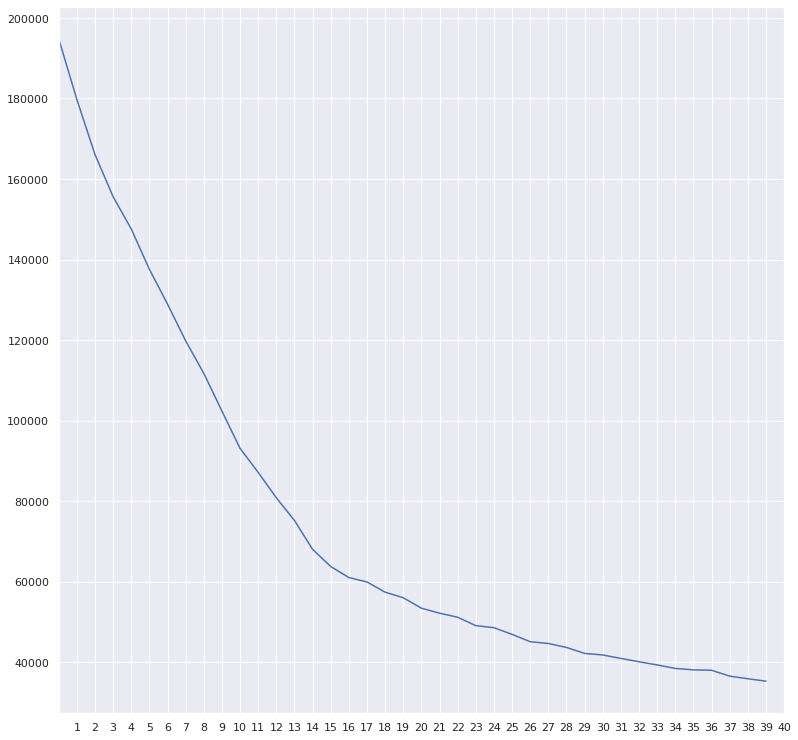

In [61]:
resultado.inertia.plot(xticks=resultado.grupos)

* Com o aumento de centroides alguns dados que deveriam estar no mesmo grupo podem estar em grupos diferentes;
* Elbow method indica o ponto de otimização, ponto do cotovelo;
* Inertia é o erro, a distância do centroide para cada dado pertencente ao grupo.

> Vamos dizer que a distância de um ponto de um grupo para o centróide é 2, quando somamos as distâncias de todos os pontos chamamos de erro médio absoluto (*mean absolute erro* - MAE). Porém, queremos penalizar os pontos mais distantes do centróide por poder não pertencer ao grupo. Uma maneira é elevando suas distâncias ao quadrado, chamado erro médio quadrado (*mean squarred error* - MSE)

> [Mean absolute error OR root mean squared error?](https://stats.stackexchange.com/questions/48267/mean-absolute-error-or-root-mean-squared-error)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8caaad8d0>,
      dtype=object)

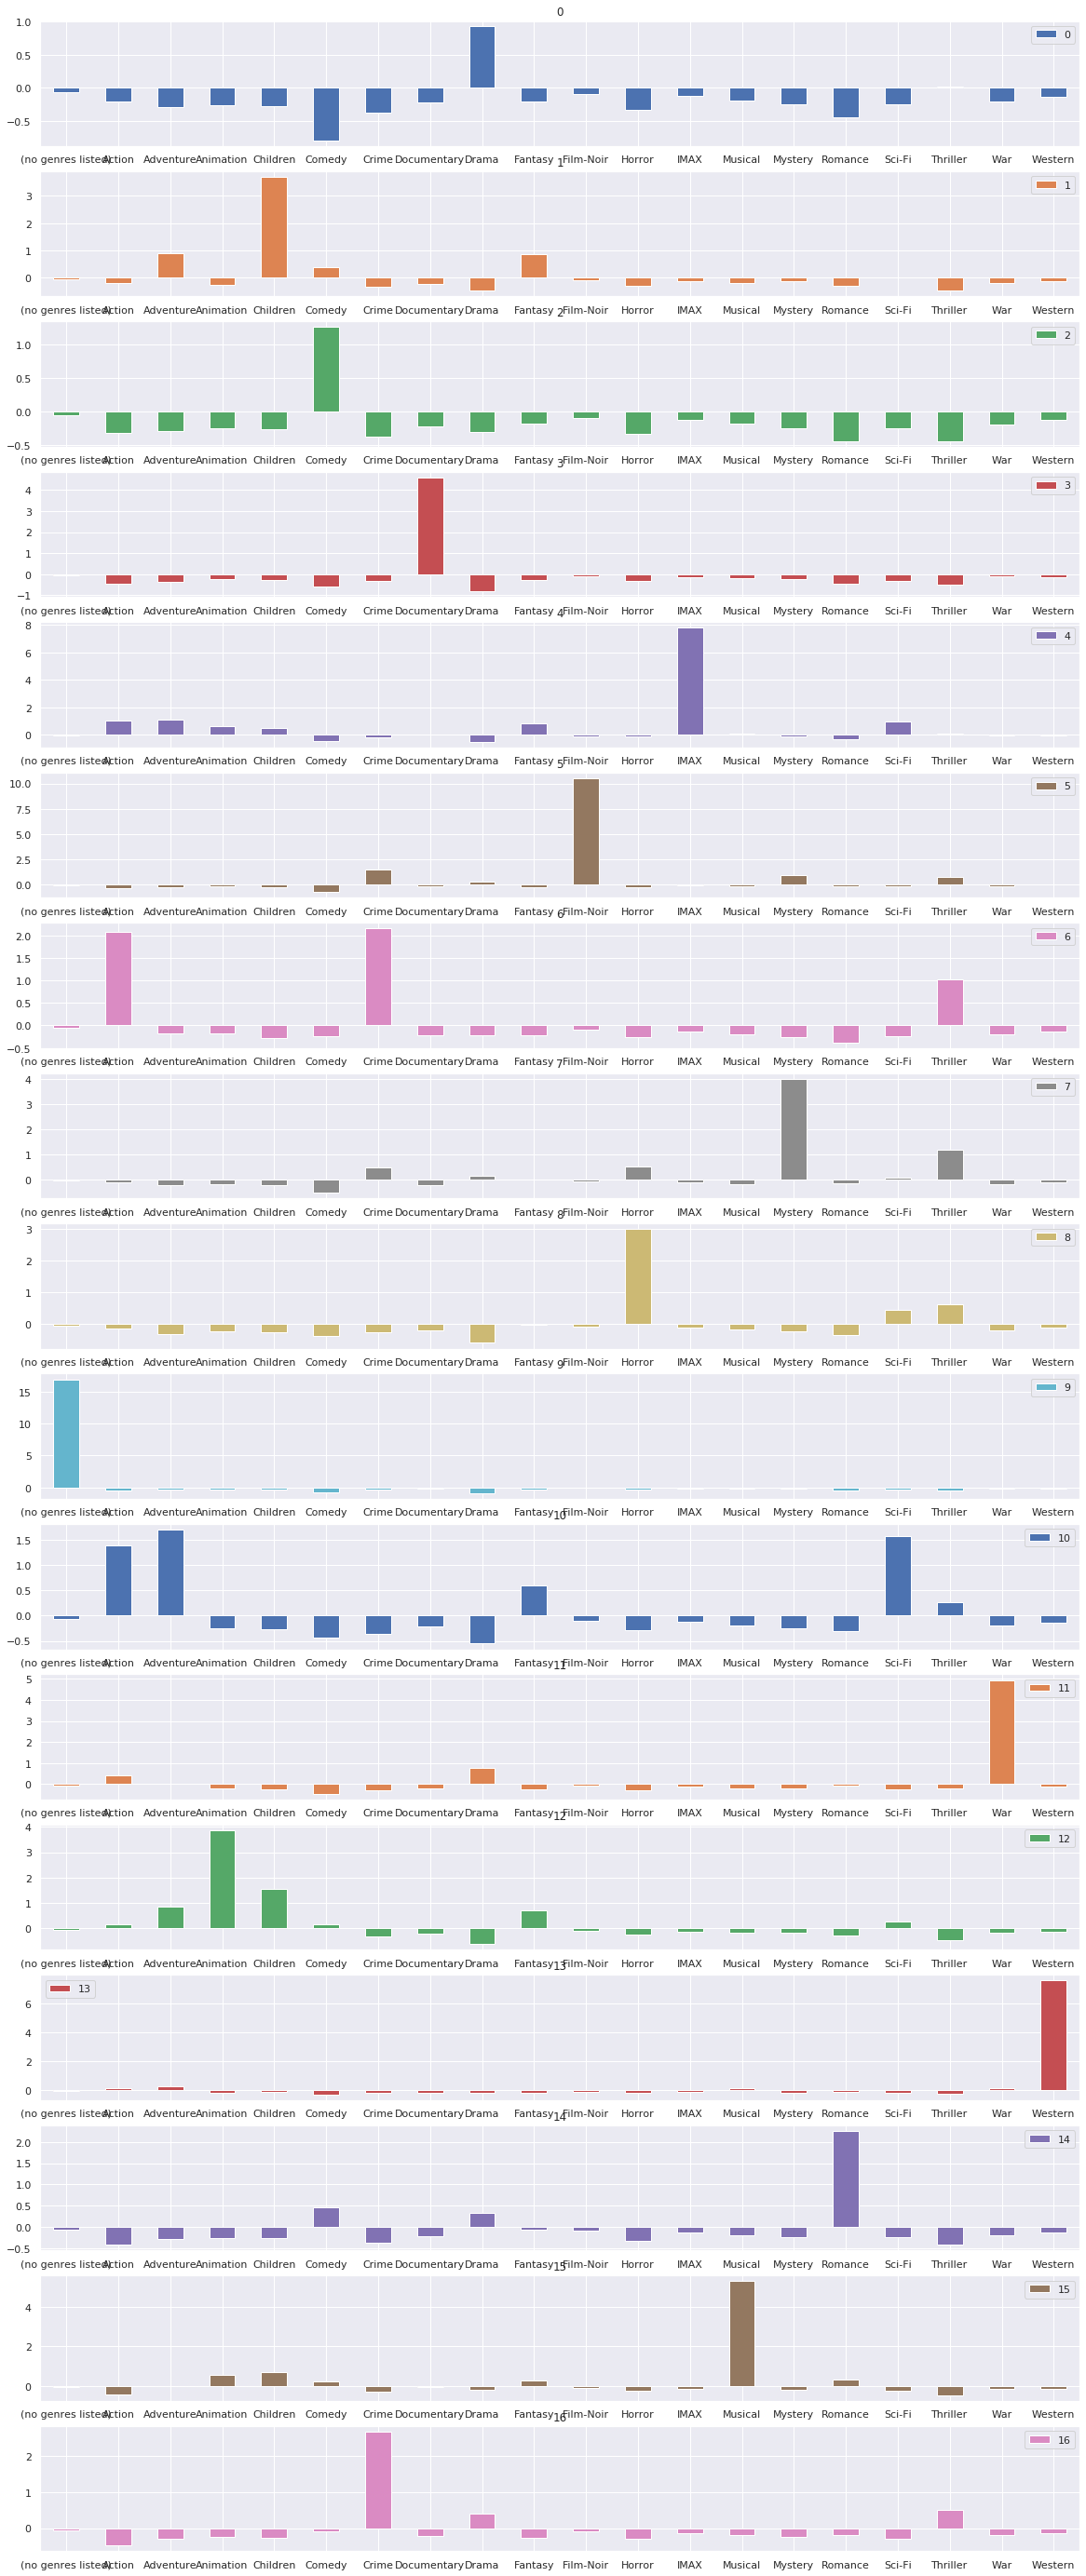

In [62]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(20,50), sharex=False,
                            rot=0)

In [63]:
grupo = 0
filtro = modelo.labels_ == grupo
dados[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4820,7181,Ship of Fools (1965),Drama,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.29481,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
6420,51167,My Father and My Son (Babam ve oglum) (2005),Drama,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.29481,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
4099,5875,Personal Velocity (2002),Drama,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.29481,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
3931,5528,One Hour Photo (2002),Drama|Thriller,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.29481,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,2.035586,-0.20202,-0.132065
9564,173751,Tiger Raid (2016),Thriller,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.29481,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,2.035586,-0.20202,-0.132065
4850,7251,Where the Day Takes You (1992),Drama,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.29481,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
7142,71438,Still Walking (Aruitemo aruitemo) (2008),Drama,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.29481,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
8560,116411,Tangerines (2013),Drama,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.29481,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
2655,3553,Gossip (2000),Drama|Thriller,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.29481,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,2.035586,-0.20202,-0.132065
1165,1545,Ponette (1996),Drama,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.29481,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065


# Agrupamentos hierarquicos

In [64]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [65]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 57.573315  , -29.112373  ],
       [-21.708448  ,  19.180552  ],
       [-33.65697   ,  -0.70439464],
       ...,
       [  6.9421997 ,  29.140574  ],
       [ 69.46841   ,  31.545609  ],
       [ -7.700965  ,  -6.969439  ]], dtype=float32)

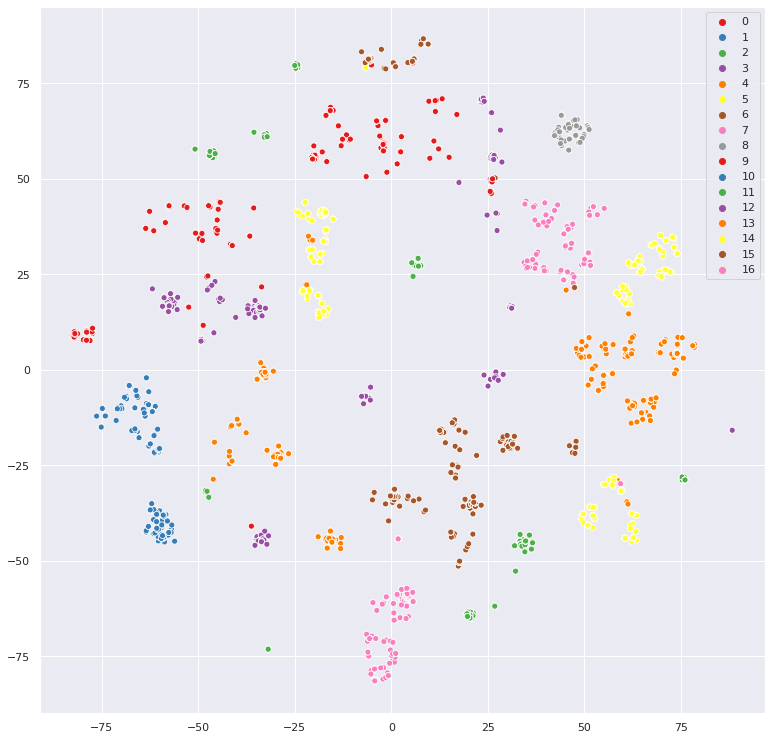

In [66]:
sns.set(rc={'figure.figsize': (13,13)})
sns.scatterplot(x=visualizacao[:,0],y=visualizacao[:,1], hue=grupos,
                palette=sns.color_palette('Set1', 17))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8c9ea4978>,
      dtype=object)

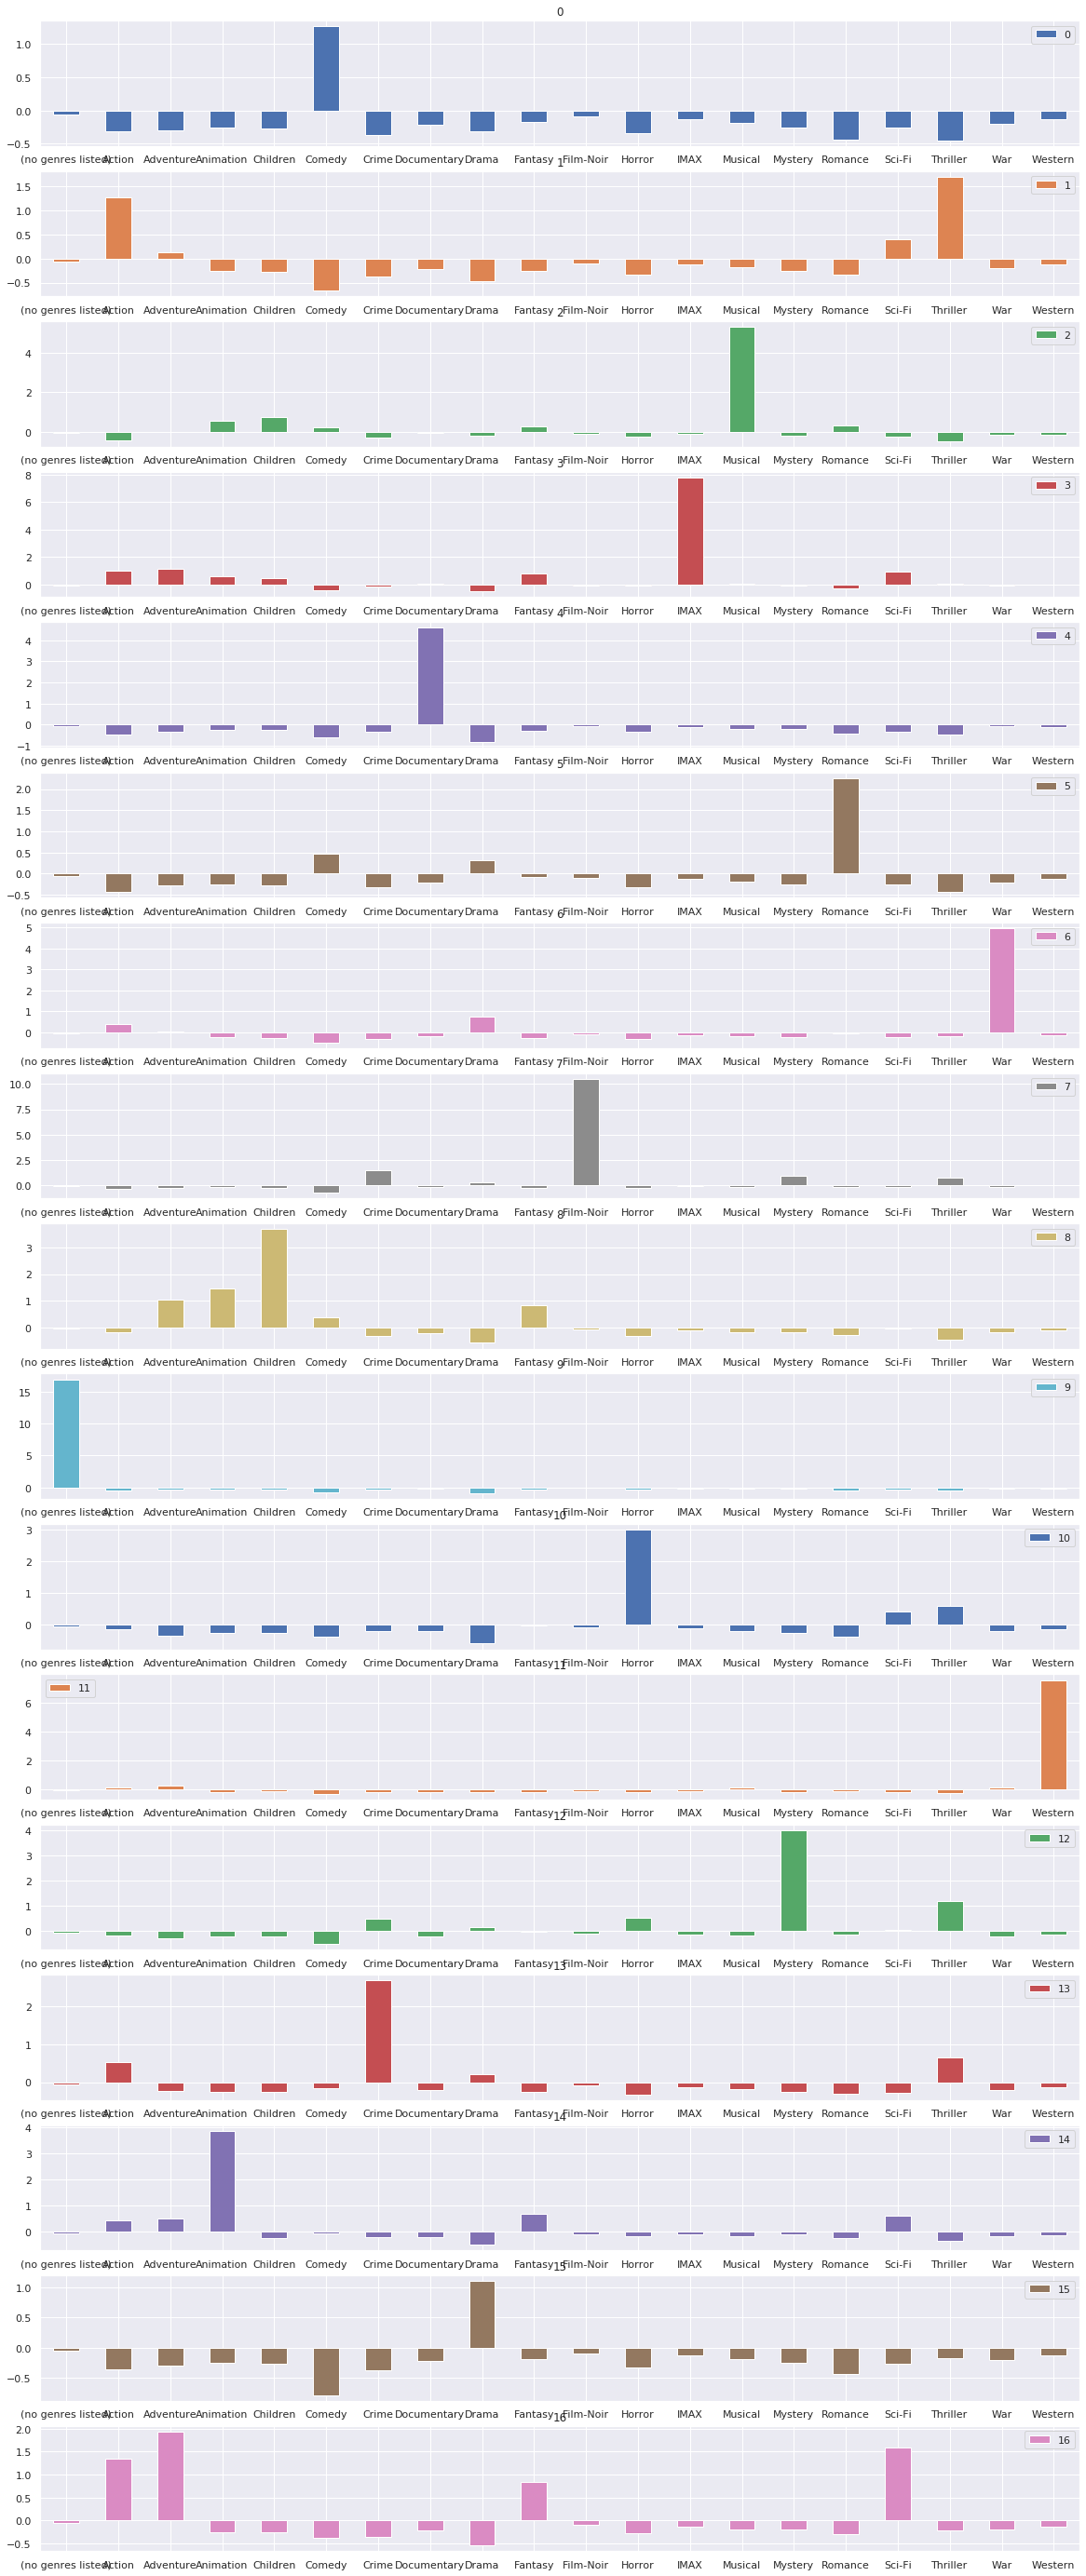

In [67]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(20,50), sharex=False,
                            rot=0)

In [68]:
matriz_de_dist = linkage(grupos)
matriz_de_dist

array([[ 0.        , 15.        ,  2.50734709,  2.        ],
       [ 5.        , 17.        ,  2.88494692,  3.        ],
       [ 1.        , 18.        ,  3.04031509,  4.        ],
       [16.        , 19.        ,  3.1131277 ,  5.        ],
       [13.        , 20.        ,  3.45723104,  6.        ],
       [10.        , 21.        ,  3.82394387,  7.        ],
       [14.        , 22.        ,  4.58961345,  8.        ],
       [ 8.        , 23.        ,  4.7398519 ,  9.        ],
       [12.        , 24.        ,  4.75364631, 10.        ],
       [ 4.        , 25.        ,  5.19302388, 11.        ],
       [ 6.        , 26.        ,  5.25729037, 12.        ],
       [ 2.        , 27.        ,  5.81688648, 13.        ],
       [11.        , 28.        ,  7.88822989, 14.        ],
       [ 3.        , 29.        ,  8.09383559, 15.        ],
       [ 7.        , 30.        , 10.8164952 , 16.        ],
       [ 9.        , 31.        , 17.07891197, 17.        ]])

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 2.507347087831524, 2.507347087831524, 0.0],
  [0.0, 2.884946919293032, 2.884946919293032, 2.507347087831524],
  [0.0, 3.040315086408387, 3.040315086408387, 2.884946919293032],
  [0.0, 3.1131277047949184, 3.1131277047949184, 3.040315086408387],
  [0.0, 3.4572310433216265, 3.4572310433216265, 3.1131277047949184],
  [0.0, 3.82394386892098, 3.82394386892098, 3.4572310433216265],
  [0.0, 4.589613451399384, 4.589613451399384, 3.82394386892098],
  [0.0, 4.739851900710302, 4.739851900710302, 4.589613451399384],
  [0.0, 4.753646309289341, 4.753646309289341, 4.739851900710302],
  [0.0, 5.193023878204473, 5.193023878204473, 4.753646309289341],
  [0.0, 5.257290366578027, 5.257290366578027, 5.193023878204473],
  [0.0, 5.816886484066917, 5.816886484066917, 5.257290366578027],
  [0.0, 7.888229888271912, 7.888229888271912, 5.816886484066917],
  [0.0, 8.093835

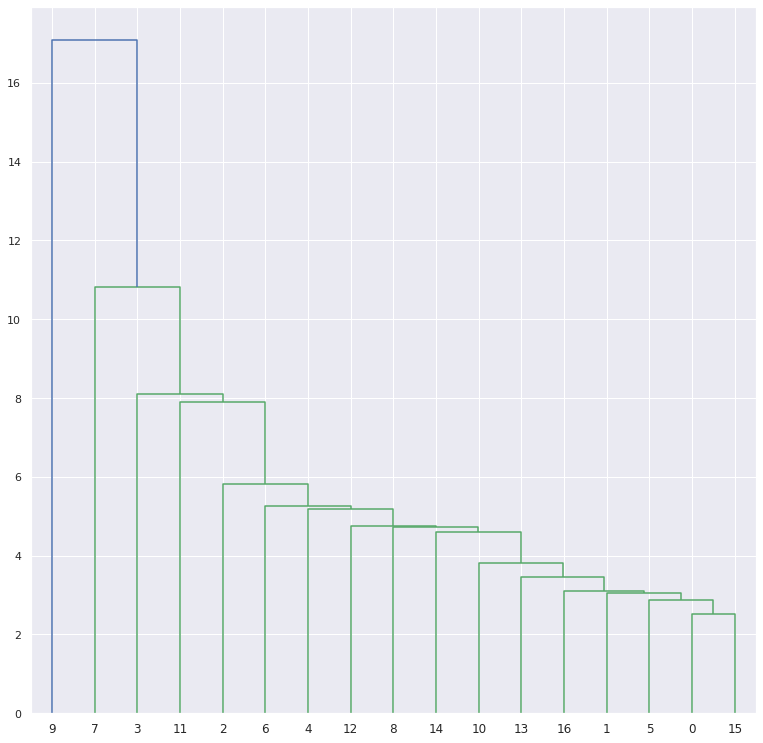

In [69]:
dendograma = dendrogram(matriz_de_dist)
dendograma

* [Hierarchical Clustering](https://www.saedsayad.com/clustering_hierarchical.htm)
* Agrupamento pode densidade, para quando não se tem o número de clusters tentando agrupar pela densidade dos pontos:
![img](https://s3.amazonaws.com/caelum-online-public/1086-introducao-a-algoritmos-nao-supervisionado/dbscan.png)

> Os pontos sem as cores dos grupos são os outliears, pontos que o `DBSCAN` achou que não pertenciam aos grupos que estavam próximos.

* [Visualizing DBSCAN Clustering](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

In [70]:
from sklearn.cluster import DBSCAN

modelo = DBSCAN()
grupos = modelo.fit_predict(generos_escalados)
grupos

array([  0,   1,   2, ...,  11, 227,   4])